In [1]:
import numpy as np
import os, sys
import pandas as pd
import scipy.stats
import scipy.io as spio


# root directory is 2 dirs up from this file
# path = os.path.realpath(__file__).split('/')
# root = '/'+os.path.join(*path[0:-3])
root = '/usr/local/serenceslab/maggie/shapeDim/'
sys.path.append(os.path.join(root, 'Analysis'))


import matplotlib.pyplot as plt

from code_utils import data_utils, file_utils

In [2]:
subjects = np.arange(1,8)

make_time_resolved = True
use_bigIPS = True
concat_IPS = True;

# first load all data for all subjects, both tasks
maindat_all = []; 
repdat_all = []
mainlabs_all = []; 
replabs_all = []

for si, ss in enumerate(subjects):

    print('loading S%02d, main task'%ss)
    _, main_data_by_tr, main_labels, roi_names = data_utils.load_main_task_data(ss, make_time_resolved, \
                                                                                use_bigIPS, concat_IPS)

    maindat_all += [main_data_by_tr]
    mainlabs_all += [main_labels]

    print('loading S%02d, repeat task'%ss)
    _, rep_data_by_tr, rep_labels, roi_names = data_utils.load_repeat_task_data(ss, make_time_resolved, \
                                                                                use_bigIPS, concat_IPS)


    repdat_all += [rep_data_by_tr]
    replabs_all += [rep_labels]

loading S01, main task
loading S01, repeat task
loading S02, main task
loading S02, repeat task
loading S03, main task
loading S03, repeat task
loading S04, main task
loading S04, repeat task
loading S05, main task
loading S05, repeat task
loading S06, main task
loading S06, repeat task
loading S07, main task
loading S07, repeat task


In [3]:
from matplotlib import cm
task_names = ['Linear (1)','Linear (2)','Checker', 'Repeat (one-back)'];
n_tasks = len(task_names)
task_colors = np.flipud(cm.GnBu(np.linspace(0,1,5))[1:5,:])


In [4]:
nTRs_concat = 14;
time_axis = np.arange(0,nTRs_concat) * 0.8

In [5]:
avgTRs_targ = [4,7];
# avgTRs_targ = [3,7];

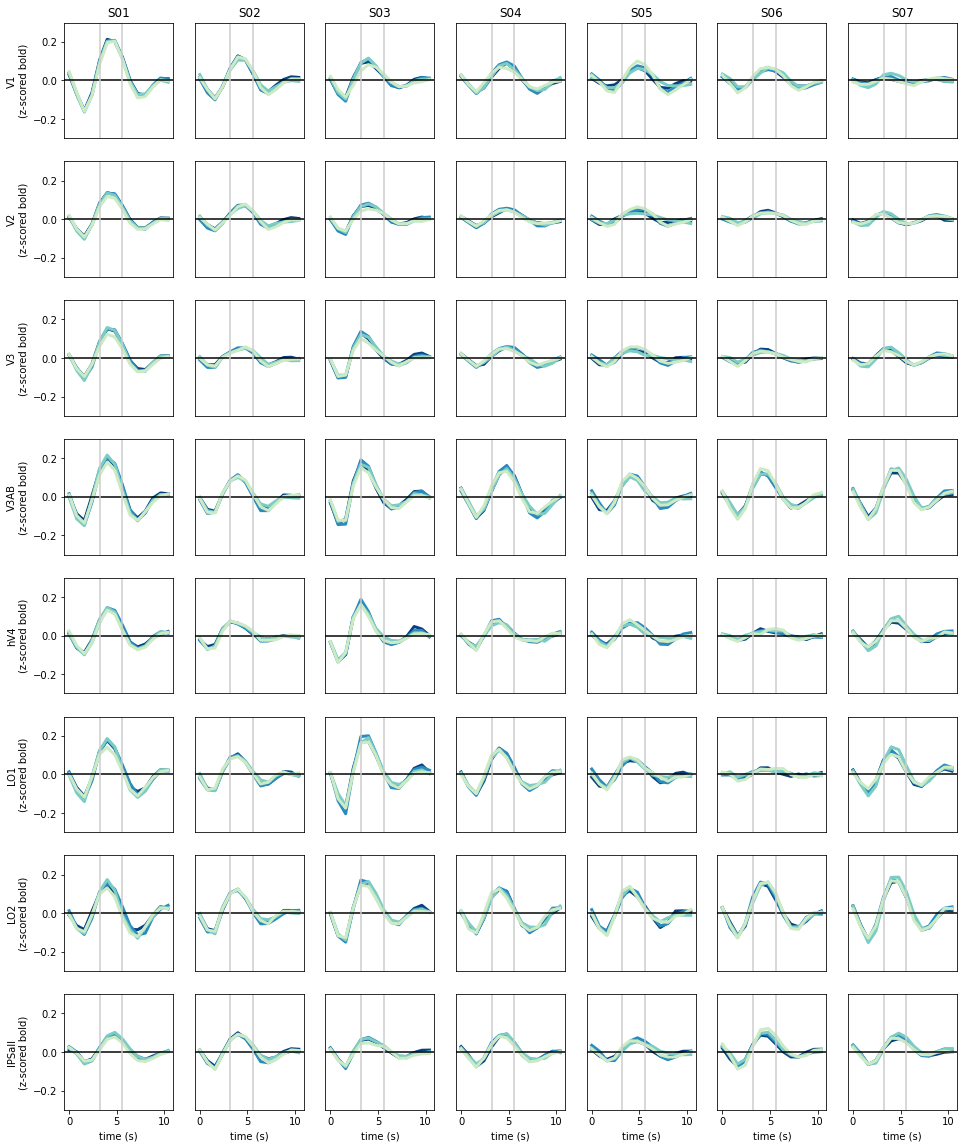

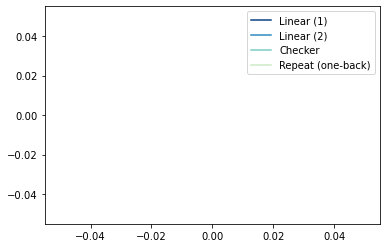

In [6]:
plt.figure(figsize=(16,20))

n_subjects = len(subjects)
n_rois = len(roi_names)

pi = 0;
for ri in range(n_rois):
    
    for si, ss in enumerate(subjects):

        pi+=1
        plt.subplot(n_rois, n_subjects, pi)
        
        dat = maindat_all[si][ri]
        tasklabs = np.array(mainlabs_all[si]['task'])
        
        for ti, task_ind in enumerate([1,2,3]):

            inds = (tasklabs==task_ind)
            
            mean_vals = np.mean(np.mean(dat[inds], axis=0), axis=1)

            plt.plot(time_axis, mean_vals, color=task_colors[ti, :], lw = 3)

        dat = repdat_all[si][ri]
        mean_vals = np.mean(np.mean(dat, axis=0), axis=1)
        ti = 3;
        plt.plot(time_axis, mean_vals, color=task_colors[ti, :], lw = 3)

        plt.ylim([-0.3, 0.3])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[avgTRs_targ[0]], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[avgTRs_targ[1]], color=[0.8, 0.8, 0.8])
        
        if ri==0:
            plt.title('S%02d'%(ss))
        if ri<(n_rois-1):
            plt.xticks([])
        else:
            plt.xlabel('time (s)')
            
        if si==0:
            plt.ylabel('%s\n(z-scored bold)'%roi_names[ri])
        else:
            plt.yticks([])
            
            
plt.figure()
for ti in range(4):
    plt.plot(0,0, color=task_colors[ti])
plt.legend(task_names)
